In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2
from qiskit.visualization import plot_histogram

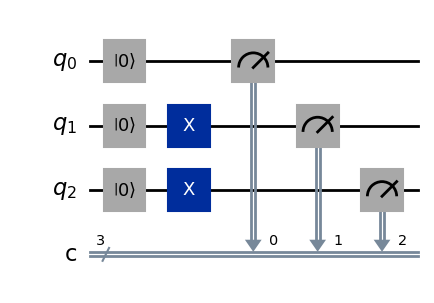

In [15]:
bit_string = input("Enter the bitstring: ")[::-1]
n_qubits = len(bit_string)

qc = QuantumCircuit(n_qubits, n_qubits)
qc.reset(range(n_qubits))

for i, bit in enumerate(bit_string):
    if bit == '1':
        qc.x(i)

qc.measure(range(n_qubits), range(n_qubits))

qc.draw('mpl')

Measurement results: {'110': 1024}


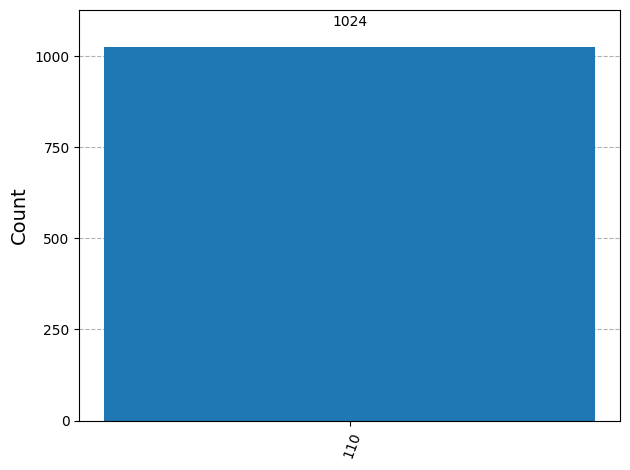

In [16]:
simulator = AerSimulator()
sampler = SamplerV2(mode=simulator)

simulation = sampler.run([qc], shots=1024)

result = simulation.result()
counts = result[0].data.c.get_counts()

print("Measurement results:", counts)
plot_histogram(counts)

In [17]:
for bit_string, count in counts.items():
    print(f"Bitstring {bit_string} was measured {count} times.")

Bitstring 110 was measured 1024 times.
